In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import class_distribution
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CustomerId.1,Exited
0,15799217,Zetticci,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,15799217,0
1,15748986,Bischof,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,15748986,0
2,15722004,Hsiung,543,France,Female,31,4,138317.94,1,0,0,61843.73,15722004,0
3,15780966,Pritchard,709,France,Female,32,2,0.00,2,0,0,109681.29,15780966,0
4,15636731,Ts'ai,714,Germany,Female,36,1,101609.01,2,1,1,447.73,15636731,0


Feature selection

In [4]:
df.drop(['CustomerId', 'Surname','CustomerId.1',], axis=1, inplace=True)

In [5]:
# Standardize the 'Gender' column by stripping spaces and capitalizing
df['Gender'] = df['Gender'].str.strip().str.capitalize()
# Verify the unique values
print(df['Gender'].unique())

['Female' 'Male']


In [6]:
distribution_of_class  = df['Exited'].value_counts()

In [7]:
distribution_of_class

Exited
0    7963
1    2037
Name: count, dtype: int64

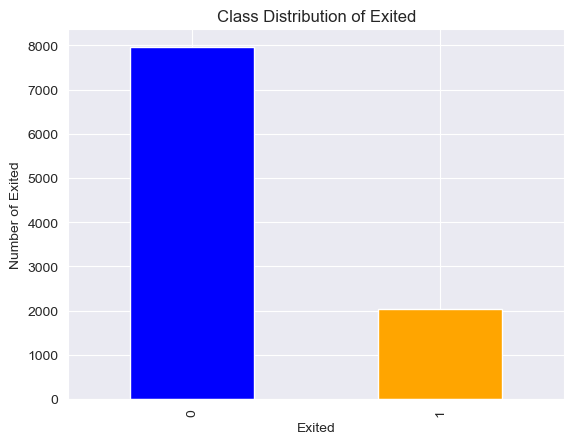

In [8]:
df['Exited'].value_counts().plot(kind='bar',color=['blue','orange'])
plt.title('Class Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Number of Exited')
plt.show()

In [9]:
ratio = distribution_of_class[0]/distribution_of_class[1]
print(f'Imbalance ratio (0 : 1): {ratio:.2f} : 1')

Imbalance ratio (0 : 1): 3.91 : 1


In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,791,Germany,Female,35,7,52436.20,1,1,0,161051.75,0
1,705,Germany,Male,42,8,166685.92,2,1,1,55313.51,0
2,543,France,Female,31,4,138317.94,1,0,0,61843.73,0
3,709,France,Female,32,2,0.00,2,0,0,109681.29,0
4,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
onehot_encoder = OneHotEncoder(sparse_output=False,)
onehot_encoder

OneHotEncoder(sparse_output=False)

In [13]:
geography_encoded = onehot_encoder.fit_transform(df[['Geography']])
geography_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [14]:
new_columns_names = onehot_encoder.get_feature_names_out()
new_columns_names

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [15]:
df = df.copy()
df[new_columns_names] = geography_encoded.astype(int)
df.drop('Geography', axis=1, inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,791,Female,35,7,52436.20,1,1,0,161051.75,0,0,1,0
1,705,Male,42,8,166685.92,2,1,1,55313.51,0,0,1,0
2,543,Female,31,4,138317.94,1,0,0,61843.73,0,1,0,0
3,709,Female,32,2,0.00,2,0,0,109681.29,0,1,0,0
4,714,Female,36,1,101609.01,2,1,1,447.73,0,0,1,0


In [16]:
le = LabelEncoder()
le

LabelEncoder()

In [17]:
# สร้างตัวแปรสำหรับเก็บ mapping
mapping = {}

# Encode the categorical variables
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(col, ': ', le.classes_)

Gender :  ['Female' 'Male']


In [18]:
df['Gender'].head()

0    0
1    1
2    0
3    0
4    0
Name: Gender, dtype: int32

In [19]:
df['Gender'].unique()

array([0, 1])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  int32  
 11  Geography_Germany  10000 non-null  int32  
 12  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(4), int64(7)
memory usage: 859.5 KB


In [21]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

In [22]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,791,0,35,7,52436.20,1,1,0,161051.75,0,1,0
1,705,1,42,8,166685.92,2,1,1,55313.51,0,1,0
2,543,0,31,4,138317.94,1,0,0,61843.73,1,0,0
3,709,0,32,2,0.00,2,0,0,109681.29,1,0,0
4,714,0,36,1,101609.01,2,1,1,447.73,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,496,0,55,4,125292.53,1,1,1,31532.96,0,1,0
9996,556,0,31,1,128663.81,2,1,0,125083.29,0,1,0
9997,589,0,61,1,0.00,1,1,0,61108.56,1,0,0
9998,714,0,25,4,0.00,2,0,0,82500.84,1,0,0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

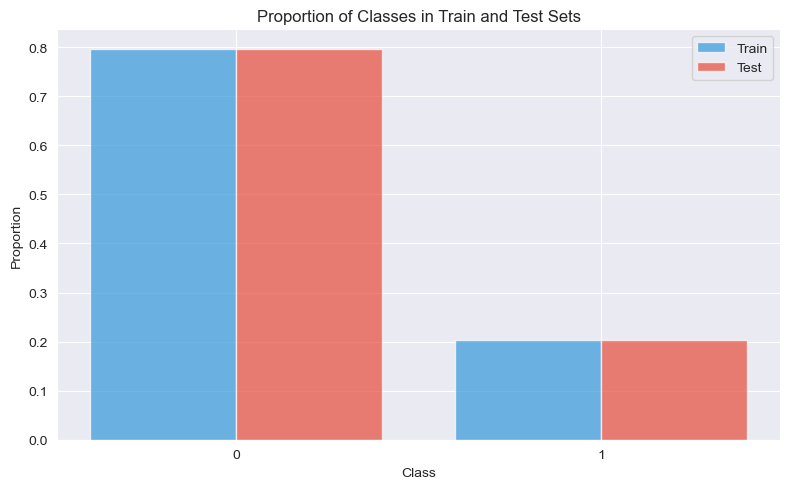

In [24]:
train_counts = y_train.value_counts(normalize=True)
test_counts = y_test.value_counts(normalize=True)

# สร้าง DataFrame สำหรับสัดส่วนของ train และ test
proportions = pd.DataFrame({
    'Train': train_counts,
    'Test': test_counts
}).reset_index()

# เปลี่ยนชื่อคอลัมน์
proportions.columns = ['Class', 'Train', 'Test']

# สร้างกราฟแท่ง
plt.figure(figsize=(8, 5))

# สีที่แตกต่างสำหรับแต่ละชุดข้อมูล
train_color = '#3498db'  # สีฟ้าสำหรับ train
test_color = '#e74c3c'   # สีแดงสำหรับ test

# วาดกราฟแท่ง
bar_width = 0.4
index = np.arange(len(proportions))

plt.bar(index, proportions['Train'], bar_width, label='Train', color=train_color, alpha=0.7)
plt.bar(index + bar_width, proportions['Test'], bar_width, label='Test', color=test_color, alpha=0.7)

# กำหนดรายละเอียดเพิ่มเติม
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Proportion of Classes in Train and Test Sets')
plt.xticks(index + bar_width / 2, proportions['Class'])
plt.legend()

# แสดงกราฟ
plt.tight_layout()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [26]:
param_grid = {
    'n_estimators': [50, 100, 150,200,300],  # จำนวนต้นไม้ในป่า
    'max_depth': [None, 5, 10, 15],  # ความลึกสูงสุดของต้นไม้
    'max_features': ['sqrt', 'log2', None],  # จำนวนฟีเจอร์ที่พิจารณาในแต่ละโหนด
    'max_leaf_nodes': [None, 10, 30, 50],  # จำนวนโหนดใบสูงสุด
    'min_samples_split': [2, 5, 10],  # จำนวนตัวอย่างขั้นต่ำในการแบ่งโหนด
    'bootstrap': [True, False]  # การสุ่มตัวอย่างแบบมีการนำตัวอย่างกลับคืนหรือไม่
}




In [27]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)

In [28]:
smote = SMOTE(random_state=42)

In [29]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, verbose=3,cv=3, scoring='accuracy', n_jobs=-1,refit=True)


In [30]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

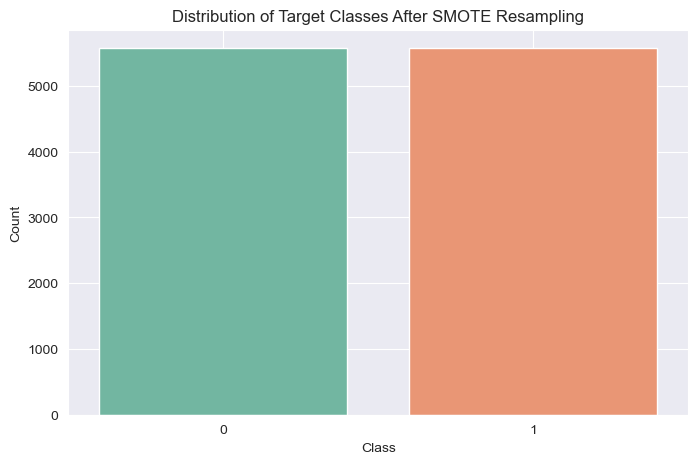

In [31]:
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_train_resampled_df['Target'] = y_train_resampled

# Plot the distribution of the target variable after resampling
plt.figure(figsize=(8, 5))
sns.countplot(x='Target', data=X_train_resampled_df, hue='Target', palette='Set2', legend=False)
plt.title('Distribution of Target Classes After SMOTE Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [32]:
# Fit Model กับข้อมูลที่ resample แล้ว
grid_search.fit(X_train_resampled, y_train_resampled)
# Get the best model
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


In [33]:
best_model

RandomForestClassifier(max_depth=15, n_estimators=300, n_jobs=-1,
                       random_state=42)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2389
           1       0.76      0.48      0.59       611

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000
 

Random Forest Accuracy: 0.86 | Precision: 0.85 | Recall: 0.86 | F1 Score: 0.85 | ROC AUC: 0.85 



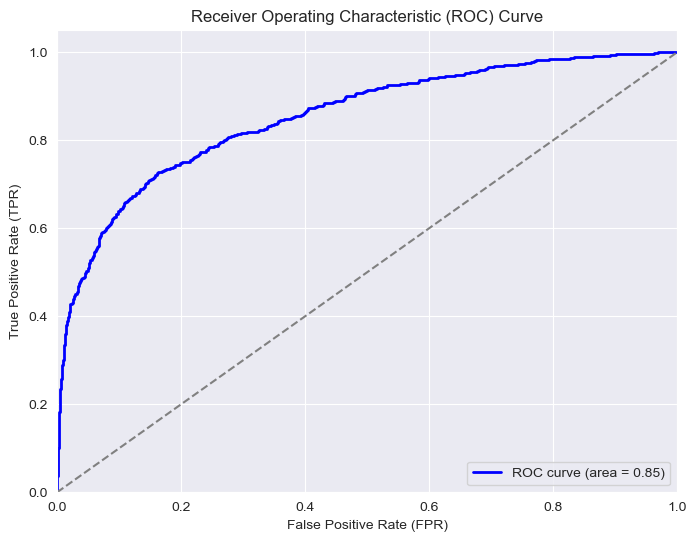

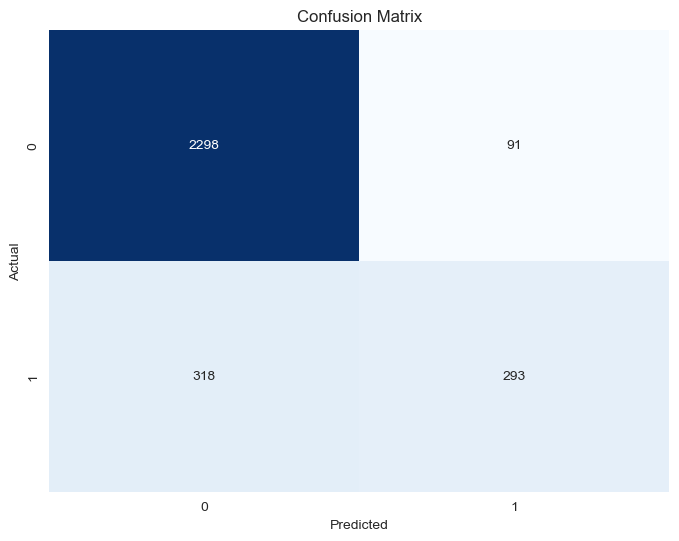

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# ฝึกโมเดล RandomForestClassifier
model = best_model
model.fit(X_train, y_train)  # ต้องฝึกโมเดลด้วยข้อมูลฝึกก่อน

# ทำนายผลลัพธ์
y_pred = best_model.predict(X_test)
# คำนวณความแม่นยำและคะแนนต่างๆ
accuracy = accuracy_score(y_test, y_pred)
presicion = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# คำนวณค่า ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# แสดงผลลัพธ์
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred), '\n')

print('Random Forest Accuracy: {:.2f} | Precision: {:.2f} | Recall: {:.2f} | F1 Score: {:.2f} | ROC AUC: {:.2f}'
      .format(accuracy, presicion, recall, f1, roc_auc), '\n')

# วาดกราฟ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# แสดง Confusion Matrix ด้วย Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


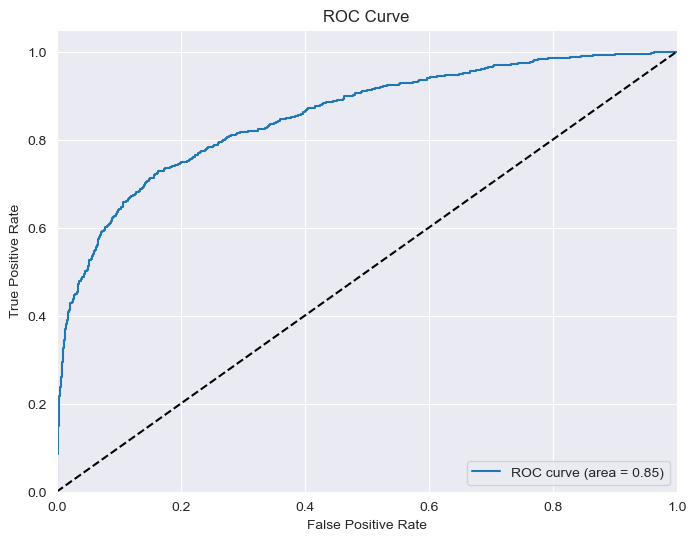

Accuracy with threshold 0.4: 0.86


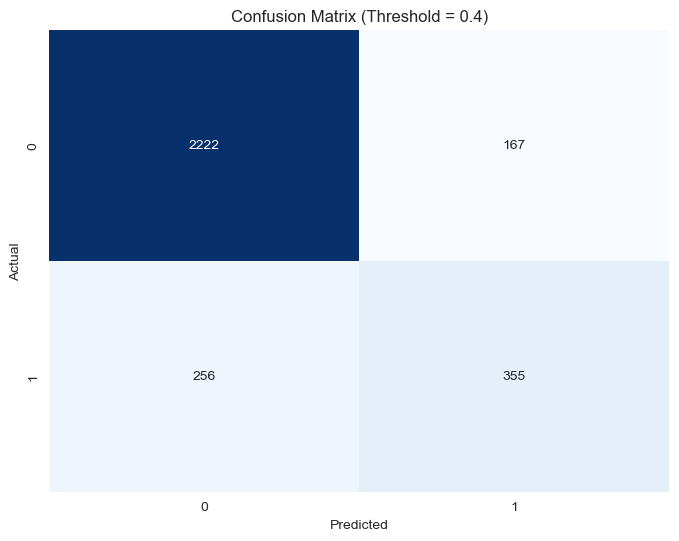

In [35]:
y_pred_proba = model.predict_proba(X_test)[:, 1]  # ความน่าจะเป็นของคลาส 1

# ปรับ threshold ที่ต้องการใช้
threshold = 0.4  # คุณสามารถเลือก threshold ใหม่ได้ เช่น 0.4

# ทำนายคลาสตาม threshold ใหม่
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# คำนวณ ROC AUC เพื่อดู performance
roc_auc = roc_auc_score(y_test, y_pred_proba)

# วาดกราฟ ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# แสดงผลความแม่นยำที่ได้จาก threshold ที่ปรับ
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
print(f'Accuracy with threshold {threshold}: {accuracy_adjusted:.2f}')

# คำนวณ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adjusted)

# แสดง Confusion Matrix ด้วย Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.show()

In [39]:
# # Save the model
import joblib
import os

# Create the directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the best model as a pickle file and name it with models_label
joblib.dump(best_model, 'models/best_model_Rb_nobinned.pkl')
joblib.dump(mapping, 'models/mapping.pkl')
# Save the column names as a pickle file
joblib.dump(X.columns, 'models/columns_Rb_nobinned.pkl')

['models/columns_Rb_nobinned.pkl']

In [40]:
df.to_csv()

',CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain\r\n0,791,0,35,7,52436.2,1,1,0,161051.75,0,0,1,0\r\n1,705,1,42,8,166685.92,2,1,1,55313.51,0,0,1,0\r\n2,543,0,31,4,138317.94,1,0,0,61843.73,0,1,0,0\r\n3,709,0,32,2,0.0,2,0,0,109681.29,0,1,0,0\r\n4,714,0,36,1,101609.01,2,1,1,447.73,0,0,1,0\r\n5,499,0,42,0,147187.84,1,1,1,14868.94,1,0,0,1\r\n6,637,1,40,2,133463.1,1,0,1,93165.34,0,1,0,0\r\n7,756,1,36,2,136815.64,1,1,1,170041.95,0,0,1,0\r\n8,487,1,33,8,145729.71,1,1,0,41365.85,0,0,0,1\r\n9,660,0,32,0,114668.89,1,1,0,84605.0,0,1,0,0\r\n10,537,0,45,7,158621.04,1,1,0,120892.96,1,1,0,0\r\n11,717,1,35,7,58469.37,2,1,1,172459.39,0,0,1,0\r\n12,555,1,32,4,0.0,2,1,1,54405.79,0,0,0,1\r\n13,535,0,27,6,0.0,2,0,1,49775.58,0,1,0,0\r\n14,655,1,34,1,116114.93,1,1,1,49492.15,0,0,0,1\r\n15,620,0,43,2,0.0,2,1,0,20670.1,0,0,0,1\r\n16,554,0,45,4,0.0,2,1,1,193412.05,0,0,0,1\r\n17,576,0,71,6,140273.47,1,1,1,193135

In [41]:
df.to_csv('preprocessed_dataset.csv')

In [43]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,791,0,35,7,52436.20,1,1,0,161051.75,0,0,1,0
1,705,1,42,8,166685.92,2,1,1,55313.51,0,0,1,0
2,543,0,31,4,138317.94,1,0,0,61843.73,0,1,0,0
3,709,0,32,2,0.00,2,0,0,109681.29,0,1,0,0
4,714,0,36,1,101609.01,2,1,1,447.73,0,0,1,0
